# Зареждаме необходимите библиотеки

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

## Зареждаме дейтасета от обединените данни 

In [2]:
df_patients = df_patients = pd.read_csv('df_combined.csv')

In [3]:
df_patients

,Unnamed: 0,PATIEND_ID,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [4]:
#Изтриваме ненужната колона Unnamed: 0
del df_patients['Unnamed: 0']



In [5]:
del df_patients['PATIEND_ID']

In [6]:
df_patients

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [7]:
stage_map = {'A':1,'B':2,'C':3,'D':4}

In [8]:
#Присвояваме стойност на стадиите
df_patients['Dukes Stage'] = df_patients['Dukes Stage'].map(stage_map)

In [9]:
gender_map = {'Male':0, 'Female':1}

In [10]:
#Присвояваме стойност на половете
df_patients['Gender'] = df_patients['Gender'].map(gender_map)

In [11]:
location_map = {'Left':0, 'Right':1,'Rectum':2,'Colon':3}

In [12]:
#Присвояваме стойност на разположението на рака
df_patients['Location'] = df_patients['Location'].map(location_map)

In [13]:
df_patients

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,1,0,0,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,2,0,0,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,3,1,0,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,4,1,0,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,3,0,0,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,3,0,0,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,4,0,1,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,3,0,0,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,1,0,2,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [14]:
#Нека да разгледаме някои особености за нашия дейтасет

([<matplotlib.patches.Wedge at 0x24189fceda0>,
 [Text(-0.8346338830256941, 0.7165097914930766, 'Male'),
  Text(0.8346338159412022, -0.7165098696371375, 'Female')],
 [Text(-0.45525484528674215, 0.3908235226325872, '77.42%'),
  Text(0.4552548086952012, -0.3908235652566204, '22.58%')])

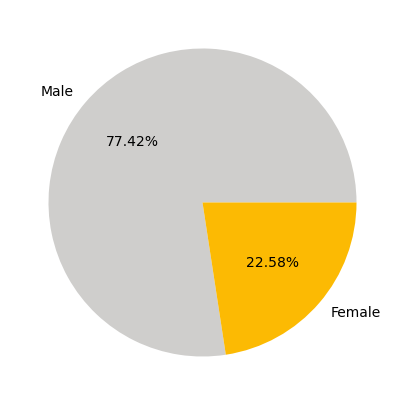

In [15]:
plt.figure(figsize=(5, 5))
plt.pie(
    df_patients["Gender"].value_counts(),
    autopct = "%.2f%%",
    labels = ["Male", "Female"],
    colors = ["#cfcecc", "#fcba03"]
)

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(
    df_patients["DFS event"].value_counts(),
    autopct = "%.2f%%",
    labels = ["Remission", "Recurrence"],
    colors = ["#cfcecc", "#fcba03"]
)

([<matplotlib.patches.Wedge at 0x24185612c80>,
 [Text(0.4844335995233389, 0.9875849774337707, 'Left'),
  Text(-1.0943562664864532, -0.11128504841995318, 'Right'),
  Text(0.484433414594573, -0.9875850681456473, 'Rectum'),
  Text(1.0943562352286353, -0.11128535580303443, 'Colon')],
 [Text(0.2642365088309121, 0.5386827149638749, '35.48%'),
  Text(-0.5969215999017017, -0.06070093550179264, '32.26%'),
  Text(0.26423640796067616, -0.5386827644430803, '29.03%'),
  Text(0.5969215828519828, -0.060701103165291495, '3.23%')])

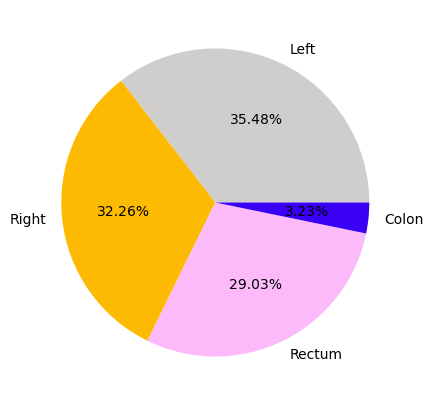

In [16]:
plt.figure(figsize=(5, 5))
plt.pie(
    df_patients["Location"].value_counts(),
    autopct = "%.2f%%",
    labels = ["Left", "Right","Rectum","Colon"],
    colors = ["#cfcecc", "#fcba03","#fcbafb","#3a00f5"]
)

In [17]:
df_test = df_patients

In [18]:
df_test

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,1,0,0,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,2,0,0,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,3,1,0,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,4,1,0,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,3,0,0,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,3,0,0,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,4,0,1,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,3,0,0,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,1,0,2,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


# TESTING HERE

In [19]:
features = df_test._get_numeric_data().columns

In [20]:
features

Index(['Age (in years)', 'Dukes Stage', 'Gender', 'Location',
       'DFS (in months)', 'DFS event', 'Adj_Radio', 'Adj_Chem', '117_at',
       '1007_s_at',
       ...
       '1554911_at', '1554912_at', '1554914_at', '1554915_a_at',
       '1554916_a_at', '1554918_a_at', '1554919_s_at', '1554920_at',
       '213418_at', '1554921_a_at'],
      dtype='object', length=1943)

In [21]:
# Selecting the 'DFS event' column
dfs_event =  df_test['DFS event']

# Selecting the rest of the features
features =  df_test.drop('DFS event', axis=1)

# Calculating the correlation
correlations = features.corrwith(dfs_event)

# Separating positive and negative correlations
positive_correlations = correlations[correlations > 0]
negative_correlations = correlations[correlations < 0]

# Printing the positive correlations
print("Positive Correlations:")
print(positive_correlations)

# Printing the negative correlations
print("Negative Correlations:")
print(negative_correlations)

C:\Users\Borislav\AppData\Local\Temp\ipykernel_6540\2894284647.py:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = features.corrwith(dfs_event)


Positive Correlations:
Age (in years)    0.144688
Gender            0.129373
Location          0.107203
1007_s_at         0.175374
1438_at           0.011059
                    ...   
1554905_x_at      0.087249
1554910_at        0.040546
1554914_at        0.151663
1554915_a_at      0.131227
1554919_s_at      0.043922
Length: 904, dtype: float64
Negative Correlations:
Dukes Stage       -0.052400
DFS (in months)   -0.456020
Adj_Radio         -0.177496
Adj_Chem          -0.059427
117_at            -0.043004
                     ...   
1554916_a_at      -0.121907
1554918_a_at      -0.099247
1554920_at        -0.017765
213418_at         -0.062338
1554921_a_at      -0.076774
Length: 1038, dtype: float64


In [22]:
df_test_1 = df_test.drop('ID_REF', axis = 1)

In [23]:
df_test_1.isnull().sum()


Age (in years)     0
Dukes Stage        0
Gender             0
Location           0
DFS (in months)    0
                  ..
1554918_a_at       0
1554919_s_at       0
1554920_at         0
213418_at          0
1554921_a_at       0
Length: 1943, dtype: int64

In [24]:
# Separate the features and the target variable
X = df_test_1.drop('DFS event', axis=1)
y = df_test_1['DFS event']

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['DFS (in months)', '1431_at', '1552399_a_at', '1552491_at',
       '1552794_a_at', '1553027_a_at', '1553162_x_at', '1553423_a_at',
       '1553430_a_at', '1553505_at', '1553831_at', '1553858_at',
       '1553971_a_at', '1554198_at', '1554206_at', '1554225_a_at',
       '1554239_s_at', '1554554_at', '1554610_at', '1554800_at'],
      dtype='object')


In [36]:
for feature in selected_features:
    correlation = X[feature].corr(y)
    print(f"Correlation between 'DFS event' and {feature}: {correlation}")

Correlation between 'DFS event' and DFS (in months): -0.45602003242451095
Correlation between 'DFS event' and 1431_at: -0.4142157020553336
Correlation between 'DFS event' and 1552399_a_at: -0.34230702106711053
Correlation between 'DFS event' and 1552491_at: -0.33606839491273033
Correlation between 'DFS event' and 1552794_a_at: 0.34528876470320596
Correlation between 'DFS event' and 1553027_a_at: -0.32102640880943695
Correlation between 'DFS event' and 1553162_x_at: -0.4255742180333936
Correlation between 'DFS event' and 1553423_a_at: -0.37489522187054086
Correlation between 'DFS event' and 1553430_a_at: -0.34017599999413345
Correlation between 'DFS event' and 1553505_at: -0.35051605981439377
Correlation between 'DFS event' and 1553831_at: 0.32743268390598196
Correlation between 'DFS event' and 1553858_at: -0.31764942419948
Correlation between 'DFS event' and 1553971_a_at: 0.34747140733006326
Correlation between 'DFS event' and 1554198_at: 0.32734549610583236
Correlation between 'DFS ev

In [25]:
#Нека направим проверка, ръчно

In [28]:
df_test_1['DFS event'].corr(df_test_1['DFS (in months)'])


-0.45602003242451095

In [29]:
df_test_1['DFS event'].corr(df_test_1['1431_at']

-0.4142157020553336

In [30]:
df_test_1['DFS event'].corr(df_test_1['1552491_at'])

-0.33606839491273033

In [31]:
df_test_1['DFS event'].corr(df_test_1['1552794_a_at'])


0.3452887647032059

In [32]:
df_test_1['DFS event'].corr(df_test_1['1553027_a_at'])


-0.32102640880943695

In [33]:
df_test_1['DFS event'].corr(df_test_1['1553162_x_at'])


-0.4255742180333936

In [34]:
df_test_1['DFS event'].corr(df_test_1['1553423_a_at'])


-0.37489522187054086

In [35]:
df_test_1['DFS event'].corr(df_test_1['1553430_a_at'])


-0.34017599999413345

In [ ]:
### Testing here

## Нека се запознаем с данните 
### Колоните представляват нашите особености за пациента, нека ги съхраним в лист 

In [ ]:
features_patients = df_patients.columns.tolist()[1:] 

In [ ]:
features_patients

In [ ]:
df_patients[features_patients].describe()

In [ ]:
for i in range(38):
    print('Columns', 50*i+1 , 'to', 50*i+50)
    df_patients.iloc[:,50*i+1:50*i+50+1].plot(kind='box', figsize=(15,5))
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()
    
# separate plot for incomplete last block
print('Columns', 1901 , 'to', 1935)
df_patients.iloc[:,1901:1945+1].plot(kind='box', figsize=(15,5))
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
matrix = df_patients.corr()

In [ ]:
matrix.style.background_gradient()

In [ ]:
# calc correlation matrix
corr_pearson = df_patients[features_patients].corr(method='pearson')
# mask lower triangle to avoid redundant values later
corr_pearson = corr_pearson.mask(np.tril(np.ones(corr_pearson.shape)).astype(np.bool))

In [ ]:
# convert matrix in data frame
df_corr = pd.DataFrame(corr_pearson).melt(var_name='x2', 
                                          value_name='corr_p',
                                          ignore_index=False)
df_corr.insert(loc=0, column='x1', value=df_corr.index)

# remove redundancies
df_corr = df_corr[~df_corr.corr_p.isna()]

# reset index
df_corr = df_corr.reset_index(drop=True)

In [ ]:
df_corr

In [ ]:
df_corr.nlargest(10, columns='corr_p')

In [ ]:
df_corr.nsmallest(10, columns='corr_p')

In [ ]:
dfs_event = 'DFS event'

In [ ]:
df_test = df_corr[dfs_event]

In [ ]:
dfs_event = 'DFS event'  # Target feature

In [ ]:
selected_columns = features_patients + [dfs_event]
data_selected = df_patients[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Extract the correlation values for DFS event with all other features
dfs_event_correlation = correlation_matrix[dfs_event]

# Remove the correlation value of DFS event with itself
dfs_event_correlation = dfs_event_correlation.drop(dfs_event)

# Print the correlation values
print(dfs_event_correlation)

In [ ]:
dfs_event_correlation = dfs_event_correlation.iloc[: , 1:]
sorted_correlations = dfs_event_correlation.sort_values(by = ['DFS event'],axis = 0,ascending=False)

In [ ]:
dfs_event_correlation.nsmallest(10, column )

In [ ]:
dfs_event_correlation

In [ ]:
dfs_event_correlation.nlargest(10, columns='DFS event')

In [ ]:
dfs_event_correlation.dtypes

In [ ]:
dfs_event_correlation.corr(method='pearson')

In [ ]:
# convert matrix in data frame
dfs_event_correlation = pd.DataFrame(corr_pearson).melt(var_name='x2', 
                                          value_name='corr_p',
                                          ignore_index=False)
dfs_event_correlation.insert(loc=0, column='x1', value=df_corr.index)

# remove redundancies
dfs_event_correlation = dfs_event_correlation[~df_corr.corr_p.isna()]

# reset index
dfs_event_correlation = dfs_event_correlation.reset_index(drop=True)